Source:

This code is written by **Oswaldo Ludwig**

Github:
https://github.com/oswaldoludwig/Sensitivity-to-occlusion-Keras-/blob/master/occlusion_sensitivity.py

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
import math
import pylab
import seaborn as sns
#from keras.preprocessing.image import ImageDataGenerator
#from keras import optimizers
#from keras.models import Sequential
#from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
#from keras.layers import Activation, Dropout, Flatten, Dense
#from numpy.random import permutation
#from keras.optimizers import SGD

In [111]:
# Enter here the path to the image:
img_path = 'french_bulldog.jpg'
# Enter here the parameters of the occluding window:
occluding_size = 100
occluding_pixel = 0
occluding_stride = 5

In [112]:
from keras.applications.vgg16 import VGG16
from keras import backend as K
K.set_image_data_format('channels_last')

# Note that we are including the densely-connected classifier on top;
# all previous times, we were discarding it.
model = VGG16(weights='imagenet')

In [113]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# The local path to our target image
img_path = 'french_bulldog.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [114]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02108915', 'French_bulldog', 0.86868936), ('n02096585', 'Boston_bull', 0.027795592), ('n02093256', 'Staffordshire_bullterrier', 0.017619545)]



The top-3 classes predicted for this image are:

* French Bulldog (with 86.8% probability)
* Boston Bull (with 2.7% probability)
* Staffordshire Bullterrier (with 1.7% probability)

Thus our network has recognized our image as containing an undetermined quantity of French Bulldog. The entry in the prediction vector 
that was maximally activated is the one corresponding to the "French Bulldog" class, at index 245:

In [117]:
x = np.moveaxis(x, -1, 1)
x.shape

(1, 224, 3, 224)

[0.9791612] [245] 79 127
scanning position (0, 0)
scanning position (0, 1)
scanning position (0, 2)
scanning position (0, 3)
scanning position (0, 4)
scanning position (0, 5)
scanning position (0, 6)
scanning position (0, 7)
scanning position (0, 8)
scanning position (0, 9)
scanning position (0, 10)
scanning position (0, 11)
scanning position (0, 12)
scanning position (0, 13)
scanning position (0, 14)
scanning position (0, 15)
scanning position (0, 16)
scanning position (0, 17)
scanning position (0, 18)
scanning position (0, 19)
scanning position (0, 20)
scanning position (0, 21)
scanning position (0, 22)
scanning position (0, 23)
scanning position (0, 24)
scanning position (0, 25)
scanning position (0, 26)
scanning position (0, 27)
scanning position (0, 28)
scanning position (0, 29)
scanning position (0, 30)
scanning position (0, 31)
scanning position (0, 32)
scanning position (0, 33)
scanning position (0, 34)
scanning position (0, 35)
scanning position (0, 36)
scanning position (0, 3

scanning position (2, 60)
scanning position (2, 61)
scanning position (2, 62)
scanning position (2, 63)
scanning position (2, 64)
scanning position (2, 65)
scanning position (2, 66)
scanning position (2, 67)
scanning position (2, 68)
scanning position (2, 69)
scanning position (2, 70)
scanning position (2, 71)
scanning position (2, 72)
scanning position (2, 73)
scanning position (2, 74)
scanning position (2, 75)
scanning position (2, 76)
scanning position (2, 77)
scanning position (2, 78)
scanning position (2, 79)
scanning position (2, 80)
scanning position (2, 81)
scanning position (2, 82)
scanning position (2, 83)
scanning position (2, 84)
scanning position (2, 85)
scanning position (2, 86)
scanning position (2, 87)
scanning position (2, 88)
scanning position (2, 89)
scanning position (2, 90)
scanning position (2, 91)
scanning position (2, 92)
scanning position (2, 93)
scanning position (2, 94)
scanning position (2, 95)
scanning position (2, 96)
scanning position (2, 97)
scanning pos

scanning position (4, 120)
scanning position (4, 121)
scanning position (4, 122)
scanning position (4, 123)
scanning position (4, 124)
scanning position (4, 125)
scanning position (4, 126)
scanning position (5, 0)
scanning position (5, 1)
scanning position (5, 2)
scanning position (5, 3)
scanning position (5, 4)
scanning position (5, 5)
scanning position (5, 6)
scanning position (5, 7)
scanning position (5, 8)
scanning position (5, 9)
scanning position (5, 10)
scanning position (5, 11)
scanning position (5, 12)
scanning position (5, 13)
scanning position (5, 14)
scanning position (5, 15)
scanning position (5, 16)
scanning position (5, 17)
scanning position (5, 18)
scanning position (5, 19)
scanning position (5, 20)
scanning position (5, 21)
scanning position (5, 22)
scanning position (5, 23)
scanning position (5, 24)
scanning position (5, 25)
scanning position (5, 26)
scanning position (5, 27)
scanning position (5, 28)
scanning position (5, 29)
scanning position (5, 30)
scanning positi

scanning position (7, 53)
scanning position (7, 54)
scanning position (7, 55)
scanning position (7, 56)
scanning position (7, 57)
scanning position (7, 58)
scanning position (7, 59)
scanning position (7, 60)
scanning position (7, 61)
scanning position (7, 62)
scanning position (7, 63)
scanning position (7, 64)
scanning position (7, 65)
scanning position (7, 66)
scanning position (7, 67)
scanning position (7, 68)
scanning position (7, 69)
scanning position (7, 70)
scanning position (7, 71)
scanning position (7, 72)
scanning position (7, 73)
scanning position (7, 74)
scanning position (7, 75)
scanning position (7, 76)
scanning position (7, 77)
scanning position (7, 78)
scanning position (7, 79)
scanning position (7, 80)
scanning position (7, 81)
scanning position (7, 82)
scanning position (7, 83)
scanning position (7, 84)
scanning position (7, 85)
scanning position (7, 86)
scanning position (7, 87)
scanning position (7, 88)
scanning position (7, 89)
scanning position (7, 90)
scanning pos

scanning position (9, 113)
scanning position (9, 114)
scanning position (9, 115)
scanning position (9, 116)
scanning position (9, 117)
scanning position (9, 118)
scanning position (9, 119)
scanning position (9, 120)
scanning position (9, 121)
scanning position (9, 122)
scanning position (9, 123)
scanning position (9, 124)
scanning position (9, 125)
scanning position (9, 126)
scanning position (10, 0)
scanning position (10, 1)
scanning position (10, 2)
scanning position (10, 3)
scanning position (10, 4)
scanning position (10, 5)
scanning position (10, 6)
scanning position (10, 7)
scanning position (10, 8)
scanning position (10, 9)
scanning position (10, 10)
scanning position (10, 11)
scanning position (10, 12)
scanning position (10, 13)
scanning position (10, 14)
scanning position (10, 15)
scanning position (10, 16)
scanning position (10, 17)
scanning position (10, 18)
scanning position (10, 19)
scanning position (10, 20)
scanning position (10, 21)
scanning position (10, 22)
scanning po

scanning position (12, 35)
scanning position (12, 36)
scanning position (12, 37)
scanning position (12, 38)
scanning position (12, 39)
scanning position (12, 40)
scanning position (12, 41)
scanning position (12, 42)
scanning position (12, 43)
scanning position (12, 44)
scanning position (12, 45)
scanning position (12, 46)
scanning position (12, 47)
scanning position (12, 48)
scanning position (12, 49)
scanning position (12, 50)
scanning position (12, 51)
scanning position (12, 52)
scanning position (12, 53)
scanning position (12, 54)
scanning position (12, 55)
scanning position (12, 56)
scanning position (12, 57)
scanning position (12, 58)
scanning position (12, 59)
scanning position (12, 60)
scanning position (12, 61)
scanning position (12, 62)
scanning position (12, 63)
scanning position (12, 64)
scanning position (12, 65)
scanning position (12, 66)
scanning position (12, 67)
scanning position (12, 68)
scanning position (12, 69)
scanning position (12, 70)
scanning position (12, 71)
s

scanning position (14, 84)
scanning position (14, 85)
scanning position (14, 86)
scanning position (14, 87)
scanning position (14, 88)
scanning position (14, 89)
scanning position (14, 90)
scanning position (14, 91)
scanning position (14, 92)
scanning position (14, 93)
scanning position (14, 94)
scanning position (14, 95)
scanning position (14, 96)
scanning position (14, 97)
scanning position (14, 98)
scanning position (14, 99)
scanning position (14, 100)
scanning position (14, 101)
scanning position (14, 102)
scanning position (14, 103)
scanning position (14, 104)
scanning position (14, 105)
scanning position (14, 106)
scanning position (14, 107)
scanning position (14, 108)
scanning position (14, 109)
scanning position (14, 110)
scanning position (14, 111)
scanning position (14, 112)
scanning position (14, 113)
scanning position (14, 114)
scanning position (14, 115)
scanning position (14, 116)
scanning position (14, 117)
scanning position (14, 118)
scanning position (14, 119)
scanning

scanning position (17, 5)
scanning position (17, 6)
scanning position (17, 7)
scanning position (17, 8)
scanning position (17, 9)
scanning position (17, 10)
scanning position (17, 11)
scanning position (17, 12)
scanning position (17, 13)
scanning position (17, 14)
scanning position (17, 15)
scanning position (17, 16)
scanning position (17, 17)
scanning position (17, 18)
scanning position (17, 19)
scanning position (17, 20)
scanning position (17, 21)
scanning position (17, 22)
scanning position (17, 23)
scanning position (17, 24)
scanning position (17, 25)
scanning position (17, 26)
scanning position (17, 27)
scanning position (17, 28)
scanning position (17, 29)
scanning position (17, 30)
scanning position (17, 31)
scanning position (17, 32)
scanning position (17, 33)
scanning position (17, 34)
scanning position (17, 35)
scanning position (17, 36)
scanning position (17, 37)
scanning position (17, 38)
scanning position (17, 39)
scanning position (17, 40)
scanning position (17, 41)
scanni

scanning position (19, 54)
scanning position (19, 55)
scanning position (19, 56)
scanning position (19, 57)
scanning position (19, 58)
scanning position (19, 59)
scanning position (19, 60)
scanning position (19, 61)
scanning position (19, 62)
scanning position (19, 63)
scanning position (19, 64)
scanning position (19, 65)
scanning position (19, 66)
scanning position (19, 67)
scanning position (19, 68)
scanning position (19, 69)
scanning position (19, 70)
scanning position (19, 71)
scanning position (19, 72)
scanning position (19, 73)
scanning position (19, 74)
scanning position (19, 75)
scanning position (19, 76)
scanning position (19, 77)
scanning position (19, 78)
scanning position (19, 79)
scanning position (19, 80)
scanning position (19, 81)
scanning position (19, 82)
scanning position (19, 83)
scanning position (19, 84)
scanning position (19, 85)
scanning position (19, 86)
scanning position (19, 87)
scanning position (19, 88)
scanning position (19, 89)
scanning position (19, 90)
s

scanning position (21, 103)
scanning position (21, 104)
scanning position (21, 105)
scanning position (21, 106)
scanning position (21, 107)
scanning position (21, 108)
scanning position (21, 109)
scanning position (21, 110)
scanning position (21, 111)
scanning position (21, 112)
scanning position (21, 113)
scanning position (21, 114)
scanning position (21, 115)
scanning position (21, 116)
scanning position (21, 117)
scanning position (21, 118)
scanning position (21, 119)
scanning position (21, 120)
scanning position (21, 121)
scanning position (21, 122)
scanning position (21, 123)
scanning position (21, 124)
scanning position (21, 125)
scanning position (21, 126)
scanning position (22, 0)
scanning position (22, 1)
scanning position (22, 2)
scanning position (22, 3)
scanning position (22, 4)
scanning position (22, 5)
scanning position (22, 6)
scanning position (22, 7)
scanning position (22, 8)
scanning position (22, 9)
scanning position (22, 10)
scanning position (22, 11)
scanning posit

scanning position (24, 24)
scanning position (24, 25)
scanning position (24, 26)
scanning position (24, 27)
scanning position (24, 28)
scanning position (24, 29)
scanning position (24, 30)
scanning position (24, 31)
scanning position (24, 32)
scanning position (24, 33)
scanning position (24, 34)
scanning position (24, 35)
scanning position (24, 36)
scanning position (24, 37)
scanning position (24, 38)
scanning position (24, 39)
scanning position (24, 40)
scanning position (24, 41)
scanning position (24, 42)
scanning position (24, 43)
scanning position (24, 44)
scanning position (24, 45)
scanning position (24, 46)
scanning position (24, 47)
scanning position (24, 48)
scanning position (24, 49)
scanning position (24, 50)
scanning position (24, 51)
scanning position (24, 52)
scanning position (24, 53)
scanning position (24, 54)
scanning position (24, 55)
scanning position (24, 56)
scanning position (24, 57)
scanning position (24, 58)
scanning position (24, 59)
scanning position (24, 60)
s

scanning position (26, 73)
scanning position (26, 74)
scanning position (26, 75)
scanning position (26, 76)
scanning position (26, 77)
scanning position (26, 78)
scanning position (26, 79)
scanning position (26, 80)
scanning position (26, 81)
scanning position (26, 82)
scanning position (26, 83)
scanning position (26, 84)
scanning position (26, 85)
scanning position (26, 86)
scanning position (26, 87)
scanning position (26, 88)
scanning position (26, 89)
scanning position (26, 90)
scanning position (26, 91)
scanning position (26, 92)
scanning position (26, 93)
scanning position (26, 94)
scanning position (26, 95)
scanning position (26, 96)
scanning position (26, 97)
scanning position (26, 98)
scanning position (26, 99)
scanning position (26, 100)
scanning position (26, 101)
scanning position (26, 102)
scanning position (26, 103)
scanning position (26, 104)
scanning position (26, 105)
scanning position (26, 106)
scanning position (26, 107)
scanning position (26, 108)
scanning position (

scanning position (28, 121)
scanning position (28, 122)
scanning position (28, 123)
scanning position (28, 124)
scanning position (28, 125)
scanning position (28, 126)
scanning position (29, 0)
scanning position (29, 1)
scanning position (29, 2)
scanning position (29, 3)
scanning position (29, 4)
scanning position (29, 5)
scanning position (29, 6)
scanning position (29, 7)
scanning position (29, 8)
scanning position (29, 9)
scanning position (29, 10)
scanning position (29, 11)
scanning position (29, 12)
scanning position (29, 13)
scanning position (29, 14)
scanning position (29, 15)
scanning position (29, 16)
scanning position (29, 17)
scanning position (29, 18)
scanning position (29, 19)
scanning position (29, 20)
scanning position (29, 21)
scanning position (29, 22)
scanning position (29, 23)
scanning position (29, 24)
scanning position (29, 25)
scanning position (29, 26)
scanning position (29, 27)
scanning position (29, 28)
scanning position (29, 29)
scanning position (29, 30)
scann

scanning position (31, 43)
scanning position (31, 44)
scanning position (31, 45)
scanning position (31, 46)
scanning position (31, 47)
scanning position (31, 48)
scanning position (31, 49)
scanning position (31, 50)
scanning position (31, 51)
scanning position (31, 52)
scanning position (31, 53)
scanning position (31, 54)
scanning position (31, 55)
scanning position (31, 56)
scanning position (31, 57)
scanning position (31, 58)
scanning position (31, 59)
scanning position (31, 60)
scanning position (31, 61)
scanning position (31, 62)
scanning position (31, 63)
scanning position (31, 64)
scanning position (31, 65)
scanning position (31, 66)
scanning position (31, 67)
scanning position (31, 68)
scanning position (31, 69)
scanning position (31, 70)
scanning position (31, 71)
scanning position (31, 72)
scanning position (31, 73)
scanning position (31, 74)
scanning position (31, 75)
scanning position (31, 76)
scanning position (31, 77)
scanning position (31, 78)
scanning position (31, 79)
s

scanning position (33, 92)
scanning position (33, 93)
scanning position (33, 94)
scanning position (33, 95)
scanning position (33, 96)
scanning position (33, 97)
scanning position (33, 98)
scanning position (33, 99)
scanning position (33, 100)
scanning position (33, 101)
scanning position (33, 102)
scanning position (33, 103)
scanning position (33, 104)
scanning position (33, 105)
scanning position (33, 106)
scanning position (33, 107)
scanning position (33, 108)
scanning position (33, 109)
scanning position (33, 110)
scanning position (33, 111)
scanning position (33, 112)
scanning position (33, 113)
scanning position (33, 114)
scanning position (33, 115)
scanning position (33, 116)
scanning position (33, 117)
scanning position (33, 118)
scanning position (33, 119)
scanning position (33, 120)
scanning position (33, 121)
scanning position (33, 122)
scanning position (33, 123)
scanning position (33, 124)
scanning position (33, 125)
scanning position (33, 126)
scanning position (34, 0)
sc

scanning position (36, 13)
scanning position (36, 14)
scanning position (36, 15)
scanning position (36, 16)
scanning position (36, 17)
scanning position (36, 18)
scanning position (36, 19)
scanning position (36, 20)
scanning position (36, 21)
scanning position (36, 22)
scanning position (36, 23)
scanning position (36, 24)
scanning position (36, 25)
scanning position (36, 26)
scanning position (36, 27)
scanning position (36, 28)
scanning position (36, 29)
scanning position (36, 30)
scanning position (36, 31)
scanning position (36, 32)
scanning position (36, 33)
scanning position (36, 34)
scanning position (36, 35)
scanning position (36, 36)
scanning position (36, 37)
scanning position (36, 38)
scanning position (36, 39)
scanning position (36, 40)
scanning position (36, 41)
scanning position (36, 42)
scanning position (36, 43)
scanning position (36, 44)
scanning position (36, 45)
scanning position (36, 46)
scanning position (36, 47)
scanning position (36, 48)
scanning position (36, 49)
s

scanning position (38, 62)
scanning position (38, 63)
scanning position (38, 64)
scanning position (38, 65)
scanning position (38, 66)
scanning position (38, 67)
scanning position (38, 68)
scanning position (38, 69)
scanning position (38, 70)
scanning position (38, 71)
scanning position (38, 72)
scanning position (38, 73)
scanning position (38, 74)
scanning position (38, 75)
scanning position (38, 76)
scanning position (38, 77)
scanning position (38, 78)
scanning position (38, 79)
scanning position (38, 80)
scanning position (38, 81)
scanning position (38, 82)
scanning position (38, 83)
scanning position (38, 84)
scanning position (38, 85)
scanning position (38, 86)
scanning position (38, 87)
scanning position (38, 88)
scanning position (38, 89)
scanning position (38, 90)
scanning position (38, 91)
scanning position (38, 92)
scanning position (38, 93)
scanning position (38, 94)
scanning position (38, 95)
scanning position (38, 96)
scanning position (38, 97)
scanning position (38, 98)
s

scanning position (40, 110)
scanning position (40, 111)
scanning position (40, 112)
scanning position (40, 113)
scanning position (40, 114)
scanning position (40, 115)
scanning position (40, 116)
scanning position (40, 117)
scanning position (40, 118)
scanning position (40, 119)
scanning position (40, 120)
scanning position (40, 121)
scanning position (40, 122)
scanning position (40, 123)
scanning position (40, 124)
scanning position (40, 125)
scanning position (40, 126)
scanning position (41, 0)
scanning position (41, 1)
scanning position (41, 2)
scanning position (41, 3)
scanning position (41, 4)
scanning position (41, 5)
scanning position (41, 6)
scanning position (41, 7)
scanning position (41, 8)
scanning position (41, 9)
scanning position (41, 10)
scanning position (41, 11)
scanning position (41, 12)
scanning position (41, 13)
scanning position (41, 14)
scanning position (41, 15)
scanning position (41, 16)
scanning position (41, 17)
scanning position (41, 18)
scanning position (41

scanning position (43, 31)
scanning position (43, 32)
scanning position (43, 33)
scanning position (43, 34)
scanning position (43, 35)
scanning position (43, 36)
scanning position (43, 37)
scanning position (43, 38)
scanning position (43, 39)
scanning position (43, 40)
scanning position (43, 41)
scanning position (43, 42)
scanning position (43, 43)
scanning position (43, 44)
scanning position (43, 45)
scanning position (43, 46)
scanning position (43, 47)
scanning position (43, 48)
scanning position (43, 49)
scanning position (43, 50)
scanning position (43, 51)
scanning position (43, 52)
scanning position (43, 53)
scanning position (43, 54)
scanning position (43, 55)
scanning position (43, 56)
scanning position (43, 57)
scanning position (43, 58)
scanning position (43, 59)
scanning position (43, 60)
scanning position (43, 61)
scanning position (43, 62)
scanning position (43, 63)
scanning position (43, 64)
scanning position (43, 65)
scanning position (43, 66)
scanning position (43, 67)
s

scanning position (45, 80)
scanning position (45, 81)
scanning position (45, 82)
scanning position (45, 83)
scanning position (45, 84)
scanning position (45, 85)
scanning position (45, 86)
scanning position (45, 87)
scanning position (45, 88)
scanning position (45, 89)
scanning position (45, 90)
scanning position (45, 91)
scanning position (45, 92)
scanning position (45, 93)
scanning position (45, 94)
scanning position (45, 95)
scanning position (45, 96)
scanning position (45, 97)
scanning position (45, 98)
scanning position (45, 99)
scanning position (45, 100)
scanning position (45, 101)
scanning position (45, 102)
scanning position (45, 103)
scanning position (45, 104)
scanning position (45, 105)
scanning position (45, 106)
scanning position (45, 107)
scanning position (45, 108)
scanning position (45, 109)
scanning position (45, 110)
scanning position (45, 111)
scanning position (45, 112)
scanning position (45, 113)
scanning position (45, 114)
scanning position (45, 115)
scanning pos

scanning position (48, 1)
scanning position (48, 2)
scanning position (48, 3)
scanning position (48, 4)
scanning position (48, 5)
scanning position (48, 6)
scanning position (48, 7)
scanning position (48, 8)
scanning position (48, 9)
scanning position (48, 10)
scanning position (48, 11)
scanning position (48, 12)
scanning position (48, 13)
scanning position (48, 14)
scanning position (48, 15)
scanning position (48, 16)
scanning position (48, 17)
scanning position (48, 18)
scanning position (48, 19)
scanning position (48, 20)
scanning position (48, 21)
scanning position (48, 22)
scanning position (48, 23)
scanning position (48, 24)
scanning position (48, 25)
scanning position (48, 26)
scanning position (48, 27)
scanning position (48, 28)
scanning position (48, 29)
scanning position (48, 30)
scanning position (48, 31)
scanning position (48, 32)
scanning position (48, 33)
scanning position (48, 34)
scanning position (48, 35)
scanning position (48, 36)
scanning position (48, 37)
scanning p

scanning position (50, 50)
scanning position (50, 51)
scanning position (50, 52)
scanning position (50, 53)
scanning position (50, 54)
scanning position (50, 55)
scanning position (50, 56)
scanning position (50, 57)
scanning position (50, 58)
scanning position (50, 59)
scanning position (50, 60)
scanning position (50, 61)
scanning position (50, 62)
scanning position (50, 63)
scanning position (50, 64)
scanning position (50, 65)
scanning position (50, 66)
scanning position (50, 67)
scanning position (50, 68)
scanning position (50, 69)
scanning position (50, 70)
scanning position (50, 71)
scanning position (50, 72)
scanning position (50, 73)
scanning position (50, 74)
scanning position (50, 75)
scanning position (50, 76)
scanning position (50, 77)
scanning position (50, 78)
scanning position (50, 79)
scanning position (50, 80)
scanning position (50, 81)
scanning position (50, 82)
scanning position (50, 83)
scanning position (50, 84)
scanning position (50, 85)
scanning position (50, 86)
s

scanning position (52, 99)
scanning position (52, 100)
scanning position (52, 101)
scanning position (52, 102)
scanning position (52, 103)
scanning position (52, 104)
scanning position (52, 105)
scanning position (52, 106)
scanning position (52, 107)
scanning position (52, 108)
scanning position (52, 109)
scanning position (52, 110)
scanning position (52, 111)
scanning position (52, 112)
scanning position (52, 113)
scanning position (52, 114)
scanning position (52, 115)
scanning position (52, 116)
scanning position (52, 117)
scanning position (52, 118)
scanning position (52, 119)
scanning position (52, 120)
scanning position (52, 121)
scanning position (52, 122)
scanning position (52, 123)
scanning position (52, 124)
scanning position (52, 125)
scanning position (52, 126)
scanning position (53, 0)
scanning position (53, 1)
scanning position (53, 2)
scanning position (53, 3)
scanning position (53, 4)
scanning position (53, 5)
scanning position (53, 6)
scanning position (53, 7)
scanning 

scanning position (55, 20)
scanning position (55, 21)
scanning position (55, 22)
scanning position (55, 23)
scanning position (55, 24)
scanning position (55, 25)
scanning position (55, 26)
scanning position (55, 27)
scanning position (55, 28)
scanning position (55, 29)
scanning position (55, 30)
scanning position (55, 31)
scanning position (55, 32)
scanning position (55, 33)
scanning position (55, 34)
scanning position (55, 35)
scanning position (55, 36)
scanning position (55, 37)
scanning position (55, 38)
scanning position (55, 39)
scanning position (55, 40)
scanning position (55, 41)
scanning position (55, 42)
scanning position (55, 43)
scanning position (55, 44)
scanning position (55, 45)
scanning position (55, 46)
scanning position (55, 47)
scanning position (55, 48)
scanning position (55, 49)
scanning position (55, 50)
scanning position (55, 51)
scanning position (55, 52)
scanning position (55, 53)
scanning position (55, 54)
scanning position (55, 55)
scanning position (55, 56)
s

scanning position (57, 69)
scanning position (57, 70)
scanning position (57, 71)
scanning position (57, 72)
scanning position (57, 73)
scanning position (57, 74)
scanning position (57, 75)
scanning position (57, 76)
scanning position (57, 77)
scanning position (57, 78)
scanning position (57, 79)
scanning position (57, 80)
scanning position (57, 81)
scanning position (57, 82)
scanning position (57, 83)
scanning position (57, 84)
scanning position (57, 85)
scanning position (57, 86)
scanning position (57, 87)
scanning position (57, 88)
scanning position (57, 89)
scanning position (57, 90)
scanning position (57, 91)
scanning position (57, 92)
scanning position (57, 93)
scanning position (57, 94)
scanning position (57, 95)
scanning position (57, 96)
scanning position (57, 97)
scanning position (57, 98)
scanning position (57, 99)
scanning position (57, 100)
scanning position (57, 101)
scanning position (57, 102)
scanning position (57, 103)
scanning position (57, 104)
scanning position (57, 

scanning position (59, 117)
scanning position (59, 118)
scanning position (59, 119)
scanning position (59, 120)
scanning position (59, 121)
scanning position (59, 122)
scanning position (59, 123)
scanning position (59, 124)
scanning position (59, 125)
scanning position (59, 126)
scanning position (60, 0)
scanning position (60, 1)
scanning position (60, 2)
scanning position (60, 3)
scanning position (60, 4)
scanning position (60, 5)
scanning position (60, 6)
scanning position (60, 7)
scanning position (60, 8)
scanning position (60, 9)
scanning position (60, 10)
scanning position (60, 11)
scanning position (60, 12)
scanning position (60, 13)
scanning position (60, 14)
scanning position (60, 15)
scanning position (60, 16)
scanning position (60, 17)
scanning position (60, 18)
scanning position (60, 19)
scanning position (60, 20)
scanning position (60, 21)
scanning position (60, 22)
scanning position (60, 23)
scanning position (60, 24)
scanning position (60, 25)
scanning position (60, 26)
s

scanning position (62, 39)
scanning position (62, 40)
scanning position (62, 41)
scanning position (62, 42)
scanning position (62, 43)
scanning position (62, 44)
scanning position (62, 45)
scanning position (62, 46)
scanning position (62, 47)
scanning position (62, 48)
scanning position (62, 49)
scanning position (62, 50)
scanning position (62, 51)
scanning position (62, 52)
scanning position (62, 53)
scanning position (62, 54)
scanning position (62, 55)
scanning position (62, 56)
scanning position (62, 57)
scanning position (62, 58)
scanning position (62, 59)
scanning position (62, 60)
scanning position (62, 61)
scanning position (62, 62)
scanning position (62, 63)
scanning position (62, 64)
scanning position (62, 65)
scanning position (62, 66)
scanning position (62, 67)
scanning position (62, 68)
scanning position (62, 69)
scanning position (62, 70)
scanning position (62, 71)
scanning position (62, 72)
scanning position (62, 73)
scanning position (62, 74)
scanning position (62, 75)
s

scanning position (64, 88)
scanning position (64, 89)
scanning position (64, 90)
scanning position (64, 91)
scanning position (64, 92)
scanning position (64, 93)
scanning position (64, 94)
scanning position (64, 95)
scanning position (64, 96)
scanning position (64, 97)
scanning position (64, 98)
scanning position (64, 99)
scanning position (64, 100)
scanning position (64, 101)
scanning position (64, 102)
scanning position (64, 103)
scanning position (64, 104)
scanning position (64, 105)
scanning position (64, 106)
scanning position (64, 107)
scanning position (64, 108)
scanning position (64, 109)
scanning position (64, 110)
scanning position (64, 111)
scanning position (64, 112)
scanning position (64, 113)
scanning position (64, 114)
scanning position (64, 115)
scanning position (64, 116)
scanning position (64, 117)
scanning position (64, 118)
scanning position (64, 119)
scanning position (64, 120)
scanning position (64, 121)
scanning position (64, 122)
scanning position (64, 123)
scan

scanning position (67, 9)
scanning position (67, 10)
scanning position (67, 11)
scanning position (67, 12)
scanning position (67, 13)
scanning position (67, 14)
scanning position (67, 15)
scanning position (67, 16)
scanning position (67, 17)
scanning position (67, 18)
scanning position (67, 19)
scanning position (67, 20)
scanning position (67, 21)
scanning position (67, 22)
scanning position (67, 23)
scanning position (67, 24)
scanning position (67, 25)
scanning position (67, 26)
scanning position (67, 27)
scanning position (67, 28)
scanning position (67, 29)
scanning position (67, 30)
scanning position (67, 31)
scanning position (67, 32)
scanning position (67, 33)
scanning position (67, 34)
scanning position (67, 35)
scanning position (67, 36)
scanning position (67, 37)
scanning position (67, 38)
scanning position (67, 39)
scanning position (67, 40)
scanning position (67, 41)
scanning position (67, 42)
scanning position (67, 43)
scanning position (67, 44)
scanning position (67, 45)
sc

scanning position (69, 58)
scanning position (69, 59)
scanning position (69, 60)
scanning position (69, 61)
scanning position (69, 62)
scanning position (69, 63)
scanning position (69, 64)
scanning position (69, 65)
scanning position (69, 66)
scanning position (69, 67)
scanning position (69, 68)
scanning position (69, 69)
scanning position (69, 70)
scanning position (69, 71)
scanning position (69, 72)
scanning position (69, 73)
scanning position (69, 74)
scanning position (69, 75)
scanning position (69, 76)
scanning position (69, 77)
scanning position (69, 78)
scanning position (69, 79)
scanning position (69, 80)
scanning position (69, 81)
scanning position (69, 82)
scanning position (69, 83)
scanning position (69, 84)
scanning position (69, 85)
scanning position (69, 86)
scanning position (69, 87)
scanning position (69, 88)
scanning position (69, 89)
scanning position (69, 90)
scanning position (69, 91)
scanning position (69, 92)
scanning position (69, 93)
scanning position (69, 94)
s

scanning position (71, 106)
scanning position (71, 107)
scanning position (71, 108)
scanning position (71, 109)
scanning position (71, 110)
scanning position (71, 111)
scanning position (71, 112)
scanning position (71, 113)
scanning position (71, 114)
scanning position (71, 115)
scanning position (71, 116)
scanning position (71, 117)
scanning position (71, 118)
scanning position (71, 119)
scanning position (71, 120)
scanning position (71, 121)
scanning position (71, 122)
scanning position (71, 123)
scanning position (71, 124)
scanning position (71, 125)
scanning position (71, 126)
scanning position (72, 0)
scanning position (72, 1)
scanning position (72, 2)
scanning position (72, 3)
scanning position (72, 4)
scanning position (72, 5)
scanning position (72, 6)
scanning position (72, 7)
scanning position (72, 8)
scanning position (72, 9)
scanning position (72, 10)
scanning position (72, 11)
scanning position (72, 12)
scanning position (72, 13)
scanning position (72, 14)
scanning position

scanning position (74, 27)
scanning position (74, 28)
scanning position (74, 29)
scanning position (74, 30)
scanning position (74, 31)
scanning position (74, 32)
scanning position (74, 33)
scanning position (74, 34)
scanning position (74, 35)
scanning position (74, 36)
scanning position (74, 37)
scanning position (74, 38)
scanning position (74, 39)
scanning position (74, 40)
scanning position (74, 41)
scanning position (74, 42)
scanning position (74, 43)
scanning position (74, 44)
scanning position (74, 45)
scanning position (74, 46)
scanning position (74, 47)
scanning position (74, 48)
scanning position (74, 49)
scanning position (74, 50)
scanning position (74, 51)
scanning position (74, 52)
scanning position (74, 53)
scanning position (74, 54)
scanning position (74, 55)
scanning position (74, 56)
scanning position (74, 57)
scanning position (74, 58)
scanning position (74, 59)
scanning position (74, 60)
scanning position (74, 61)
scanning position (74, 62)
scanning position (74, 63)
s

scanning position (76, 76)
scanning position (76, 77)
scanning position (76, 78)
scanning position (76, 79)
scanning position (76, 80)
scanning position (76, 81)
scanning position (76, 82)
scanning position (76, 83)
scanning position (76, 84)
scanning position (76, 85)
scanning position (76, 86)
scanning position (76, 87)
scanning position (76, 88)
scanning position (76, 89)
scanning position (76, 90)
scanning position (76, 91)
scanning position (76, 92)
scanning position (76, 93)
scanning position (76, 94)
scanning position (76, 95)
scanning position (76, 96)
scanning position (76, 97)
scanning position (76, 98)
scanning position (76, 99)
scanning position (76, 100)
scanning position (76, 101)
scanning position (76, 102)
scanning position (76, 103)
scanning position (76, 104)
scanning position (76, 105)
scanning position (76, 106)
scanning position (76, 107)
scanning position (76, 108)
scanning position (76, 109)
scanning position (76, 110)
scanning position (76, 111)
scanning positio

scanning position (78, 124)
scanning position (78, 125)
scanning position (78, 126)


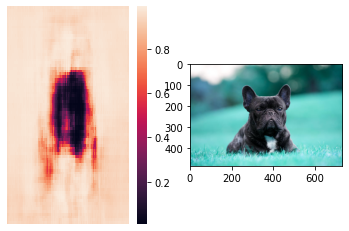

Object index is [245]


In [116]:
def Occlusion_exp(img_path, occluding_size, occluding_pixel, occluding_stride):
    
    img = cv2.imread(img_path)
    im = cv2.resize(img, (224, 224)).astype(np.float32)
    im[:,:,2] -= 103.939
    im[:,:,0] -= 116.779
    im[:,:,1] -= 123.68
    #im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    out = model.predict(im)
    out = out[0]
    # Getting the index of the winning class:
    m = max(out)
    #m=608
    #index_object=m
    index_object = [i for i, j in enumerate(out) if j == m]
    #img = cv2.resize(img, (224, 224)).astype(np.float32)

    height, width, _ = img.shape
    output_height = int(math.ceil((height-occluding_size) / occluding_stride + 1))
    output_width = int(math.ceil((width-occluding_size) / occluding_stride + 1))
    heatmap = np.zeros((output_height, output_width))
    print(out[index_object], index_object, output_height,output_width)
    for h in range(output_height):
        for w in range(output_width):
            # Occluder region:
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            # Getting the image copy, applying the occluding window and classifying it again:
            input_img = copy.copy(img)
            input_img[h_start:h_end, w_start:w_end,:] =  occluding_pixel            
            im = cv2.resize(input_img, (224, 224)).astype(np.float32)
            #im = im.transpose((2,0,1))
            im = np.expand_dims(im, axis=0)
            out = model.predict(im)
            out = out[0]
            print('scanning position (%s, %s)'%(h,w))
            # It's possible to evaluate the VGG-16 sensitivity to a specific object.
            # To do so, you have to change the variable "index_object" by the index of
            # the class of interest. The VGG-16 output indices can be found here:
            # https://github.com/HoldenCaulfieldRye/caffe/blob/master/data/ilsvrc12/synset_words.txt
            prob = (out[index_object]) 
            heatmap[h,w] = prob
    
    f = pylab.figure()
    f.add_subplot(1, 2, 1)  # this line outputs images side-by-side    
    ax = sns.heatmap(heatmap,xticklabels=False, yticklabels=False)
    f.add_subplot(1, 2, 2)
    plt.imshow(img)
    plt.show()
    print ( 'Object index is %s'%index_object)
    
Occlusion_exp(img_path, occluding_size, occluding_pixel, occluding_stride)